<a href="https://colab.research.google.com/github/richbello/sena_ggpc/blob/main/Indicadoresimpactojunio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

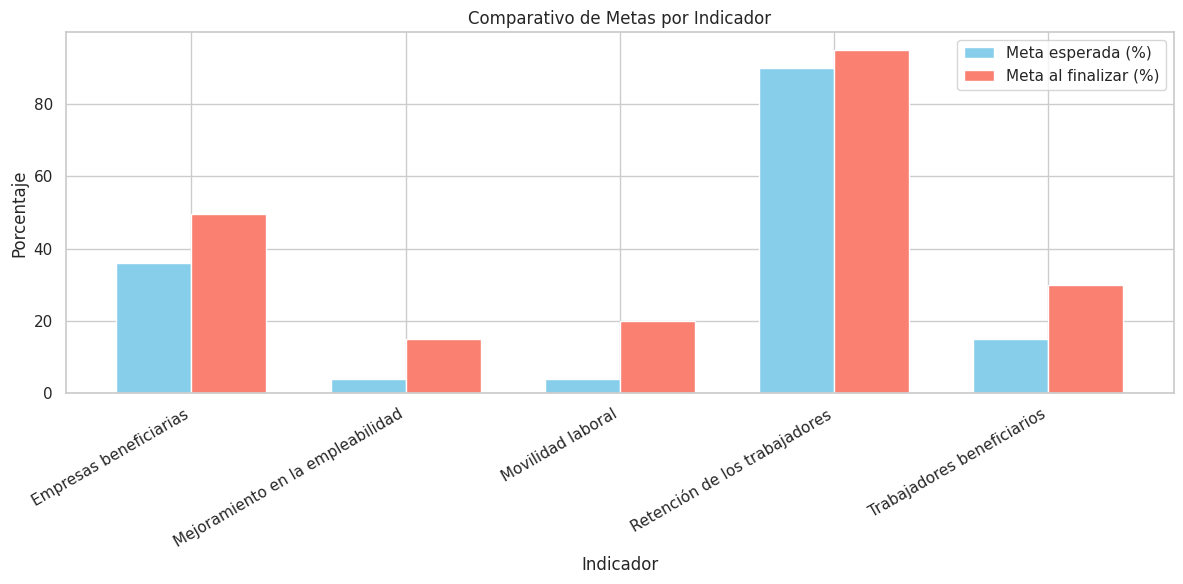

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo
sns.set(style="whitegrid")

# Datos simulados (resumen general por tipo de indicador)
data = {
    'Indicador': [
        'Empresas beneficiarias',
        'Mejoramiento en la empleabilidad',
        'Movilidad laboral',
        'Retención de los trabajadores',
        'Trabajadores beneficiarios'
    ],
    'Meta esperada (%)': [
        36.13,  # Promedio o total aproximado estimado según datos
        4.0,
        4.0,
        90.0,
        15.0
    ],
    'Meta al finalizar (%)': [
        49.67,  # Total general final
        15.0,
        20.0,
        95.0,
        30.0
    ]
}

df = pd.DataFrame(data)

# Crear gráfico de comparación por indicador
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df))

plt.bar(x, df['Meta esperada (%)'], width=bar_width, label='Meta esperada (%)', color='skyblue')
plt.bar([p + bar_width for p in x], df['Meta al finalizar (%)'], width=bar_width, label='Meta al finalizar (%)', color='salmon')

plt.xlabel('Indicador')
plt.ylabel('Porcentaje')
plt.title('Comparativo de Metas por Indicador')
plt.xticks([p + bar_width / 2 for p in x], df['Indicador'], rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


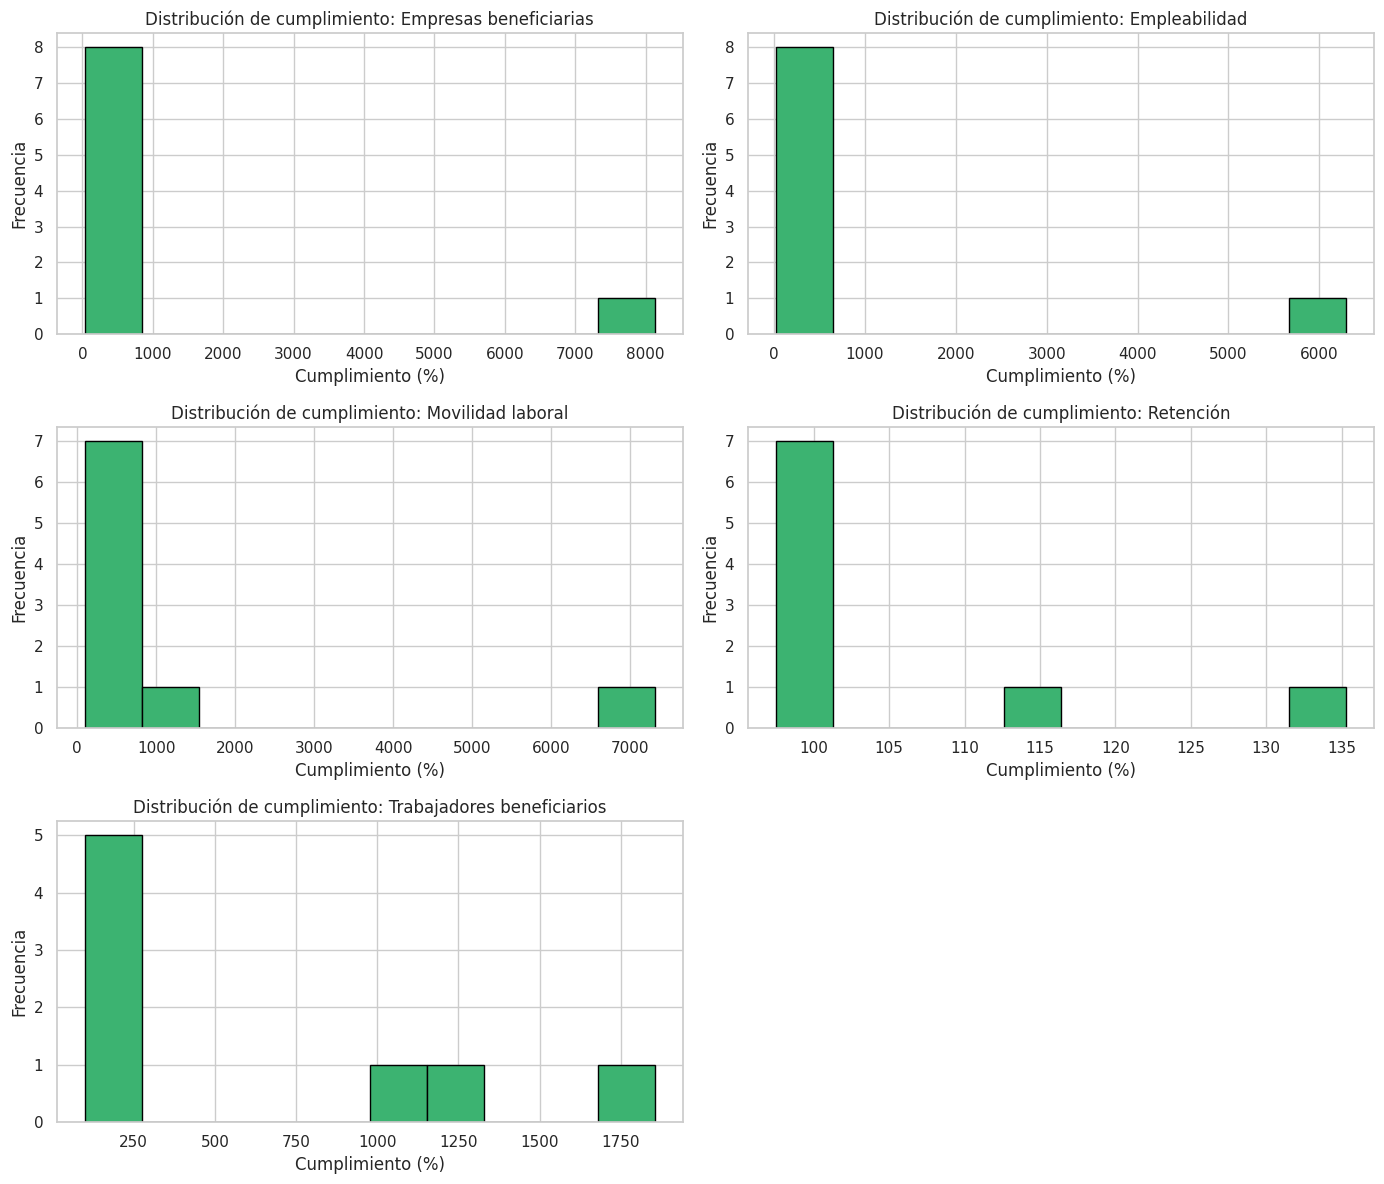

,count,mean,std,min,25%,50%,75%,max
Empresas beneficiarias cumplimiento %,9.0,1024.104282,2664.602842,37.084746,100.000000,100.000000,179.853789,8125.000000
Empleabilidad cumplimiento %,9.0,791.879273,2061.976706,21.126761,100.000000,100.000000,127.058824,6289.308176
Movilidad laboral cumplimiento %,9.0,1004.287500,2377.616983,99.169435,100.000000,100.000000,188.067227,7304.402516
Retención cumplimiento %,9.0,105.614980,12.390449,97.498739,100.000000,100.000000,101.266083,135.262500
Trabajadores beneficiarios cumplimiento %,8.0,605.560271,714.715125,100.000000,106.661891,115.795694,1185.520038,1853.594771


In [ ]:
import numpy as np

# Crear un DataFrame con los datos completos proporcionados por el usuario
# Debido al tamaño, haremos una estructura simplificada para el análisis estadístico con cada indicador
# Extraeremos los datos relevantes a partir de los nombres repetitivos de indicadores

# Datos manuales estructurados como ejemplo para algunos indicadores clave:
data_dict = {
    'Empresa': [
        'ACASEP', 'ACOPLÁSTICOS', 'ACOLAP', 'CONTACT CENTERS', 'ACESI',
        'ACIET', 'ASDESING', 'ASOPARTES', 'COOPIDROGAS', 'KERALTY'
    ],
    'Empresas beneficiarias meta': [2.00, 0.71, 128.57, 1.00, 0.00, 100.00, 29.50, 71.13, 100.00, 100.00],
    'Empresas beneficiarias final': [162.50, 0.71, 128.57, 1.00, 0.00, 100.00, 10.94, 127.93, 100.00, 375.00],
    'Empleabilidad meta': [0.85, 10.00, 2.13, 0.00, 5.00, 5.05, 2.50, 6.47, 1.59, 5.95],
    'Empleabilidad final': [1.08, 10.00, 0.45, 0.00, 5.00, 4.97, 2.50, 6.66, 100.00, 11.19],
    'Movilidad laboral meta': [0.85, 10.00, 6.17, 0.00, 5.00, 6.02, 3.15, 3.62, 1.59, 5.95],
    'Movilidad laboral final': [1.08, 10.00, 6.17, 0.00, 5.00, 5.97, 3.15, 33.30, 116.14, 11.19],
    'Retención meta': [99.15, 100.00, 110.44, 0.00, 100.00, 97.96, 97.41, 97.15, 100.00, 80.00],
    'Retención final': [96.67, 100.00, 110.44, 0.00, 100.00, 98.32, 97.41, 98.38, 116.14, 108.21],
    'Trabajadores beneficiarios meta': [0.24, 0.00, 82.00, 0.00, 0.13, 1.31, 3.06, 5.76, 100.00, 3.49],
    'Trabajadores beneficiarios final': [2.75, 0.00, 82.00, 0.00, 0.13, 17.09, 56.72, 6.65, 116.14, 3.80]
}

df = pd.DataFrame(data_dict)

# Cálculo del cumplimiento relativo en porcentaje
indicadores = ['Empresas beneficiarias', 'Empleabilidad', 'Movilidad laboral', 'Retención', 'Trabajadores beneficiarios']
for ind in indicadores:
    df[f'{ind} cumplimiento %'] = (df[f'{ind} final'] / df[f'{ind} meta']) * 100

# Estadísticas descriptivas por indicador
estadisticas = df[[f'{ind} cumplimiento %' for ind in indicadores]].describe().T

# Graficar histogramas de cumplimiento por indicador
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

for i, ind in enumerate(indicadores):
    axs[i].hist(df[f'{ind} cumplimiento %'], bins=10, color='mediumseagreen', edgecolor='black')
    axs[i].set_title(f'Distribución de cumplimiento: {ind}')
    axs[i].set_xlabel('Cumplimiento (%)')
    axs[i].set_ylabel('Frecuencia')

axs[-1].axis('off')  # última celda vacía

plt.tight_layout()
plt.show()

estadisticas


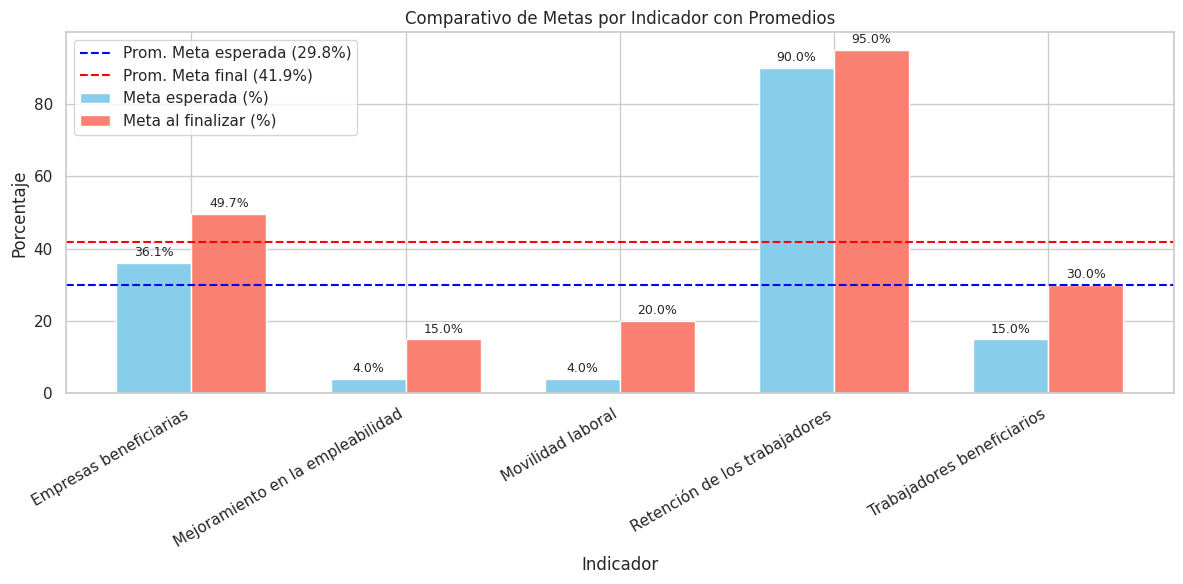

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo
sns.set(style="whitegrid")

# Datos simulados
data = {
    'Indicador': [
        'Empresas beneficiarias',
        'Mejoramiento en la empleabilidad',
        'Movilidad laboral',
        'Retención de los trabajadores',
        'Trabajadores beneficiarios'
    ],
    'Meta esperada (%)': [
        36.13,
        4.0,
        4.0,
        90.0,
        15.0
    ],
    'Meta al finalizar (%)': [
        49.67,
        15.0,
        20.0,
        95.0,
        30.0
    ]
}

df = pd.DataFrame(data)

# Cálculo de promedios
promedio_esperada = df['Meta esperada (%)'].mean()
promedio_final = df['Meta al finalizar (%)'].mean()

# Crear gráfico
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df))

# Barras
bars1 = plt.bar(x, df['Meta esperada (%)'], width=bar_width, label='Meta esperada (%)', color='skyblue')
bars2 = plt.bar([p + bar_width for p in x], df['Meta al finalizar (%)'], width=bar_width, label='Meta al finalizar (%)', color='salmon')

# Etiquetas de datos
for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Líneas de promedio
plt.axhline(promedio_esperada, color='blue', linestyle='--', linewidth=1.5, label=f'Prom. Meta esperada ({promedio_esperada:.1f}%)')
plt.axhline(promedio_final, color='red', linestyle='--', linewidth=1.5, label=f'Prom. Meta final ({promedio_final:.1f}%)')

# Ajustes de gráfico
plt.xlabel('Indicador')
plt.ylabel('Porcentaje')
plt.title('Comparativo de Metas por Indicador con Promedios')
plt.xticks([p + bar_width / 2 for p in x], df['Indicador'], rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


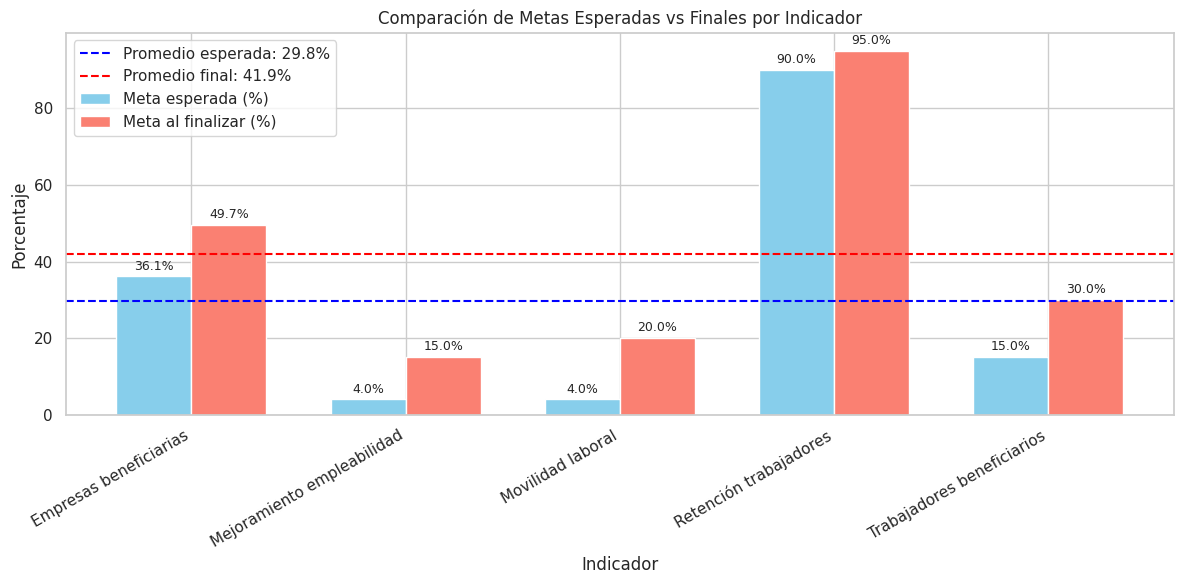

/tmp/ipython-input-2-3762438064.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Indicador', y='Diferencia (%)', data=df, palette='coolwarm')


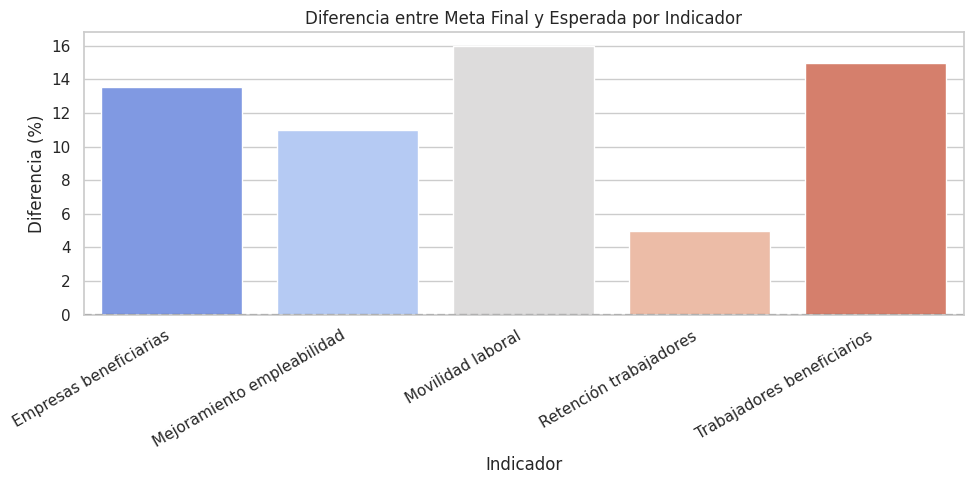

,count,mean,std,min,25%,50%,75%,max
Meta esperada (%),5.0,29.826,36.105490,4.0,4.0,15.00,36.13,90.0
Meta al finalizar (%),5.0,41.934,32.499258,15.0,20.0,30.00,49.67,95.0
Diferencia (%),5.0,12.108,4.396399,5.0,11.0,13.54,15.00,16.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

# Datos actualizados con nombres más cortos para visualización
data = {
    'Indicador': [
        'Empresas beneficiarias',
        'Mejoramiento empleabilidad',
        'Movilidad laboral',
        'Retención trabajadores',
        'Trabajadores beneficiarios'
    ],
    'Meta esperada (%)': [36.13, 4.0, 4.0, 90.0, 15.0],
    'Meta al finalizar (%)': [49.67, 15.0, 20.0, 95.0, 30.0]
}

df = pd.DataFrame(data)

# Cálculo de promedios
prom_esperada = df['Meta esperada (%)'].mean()
prom_final = df['Meta al finalizar (%)'].mean()

# Cálculo de diferencia porcentual
df['Diferencia (%)'] = df['Meta al finalizar (%)'] - df['Meta esperada (%)']

# Gráfico comparativo de barras con etiquetas y líneas de promedio
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df))

bars1 = plt.bar(x, df['Meta esperada (%)'], width=bar_width, label='Meta esperada (%)', color='skyblue')
bars2 = plt.bar([p + bar_width for p in x], df['Meta al finalizar (%)'], width=bar_width, label='Meta al finalizar (%)', color='salmon')

# Etiquetas de datos
for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Líneas de promedio
plt.axhline(prom_esperada, color='blue', linestyle='--', linewidth=1.5, label=f'Promedio esperada: {prom_esperada:.1f}%')
plt.axhline(prom_final, color='red', linestyle='--', linewidth=1.5, label=f'Promedio final: {prom_final:.1f}%')

plt.xlabel('Indicador')
plt.ylabel('Porcentaje')
plt.title('Comparación de Metas Esperadas vs Finales por Indicador')
plt.xticks([p + bar_width / 2 for p in x], df['Indicador'], rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de diferencias
plt.figure(figsize=(10, 5))
sns.barplot(x='Indicador', y='Diferencia (%)', data=df, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Diferencia entre Meta Final y Esperada por Indicador')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Tabla estadística resumen
stats_summary = df.describe().T
stats_summary
